# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
df= pd.read_excel('GermanCredit.xlsx')

print("Shape of the Data:", df.shape)
df.head()

Shape of the Data: (1000, 3)


,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [4]:
print("Number of records in the Data:", len(df))


Number of records in the Data: 1000


# 3. Plot Histogram for column 'CreditAmount'

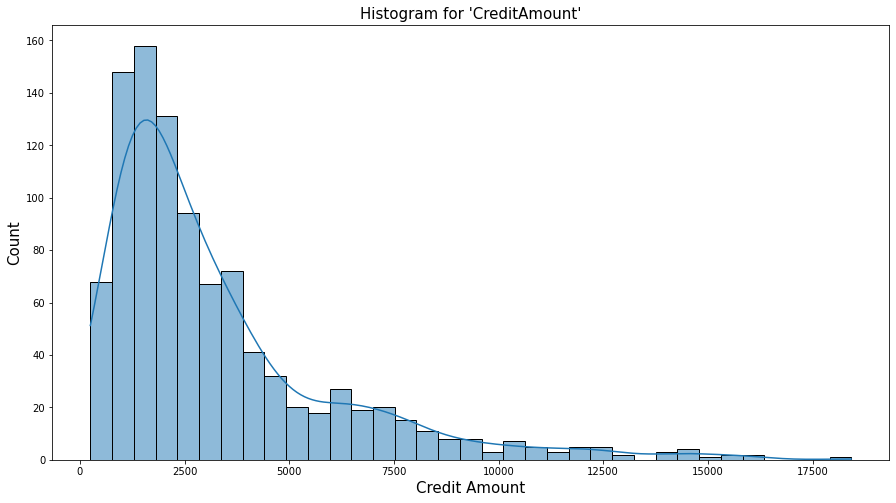

In [5]:
plt.figure(figsize= (15,8))

sns.histplot(df['CreditAmount'], kde= True)
plt.xlabel("Credit Amount", fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Histogram for 'CreditAmount'", fontsize= 15)

plt.show()


# 3b. Create creditability dataframe

In [6]:
y= df['Creditability']

creditability0= df[df['Creditability']==0]
creditability1= df[df['Creditability']==1]

In [7]:
print("Shape of the Data:", creditability0.shape)
creditability0.head()

Shape of the Data: (300, 3)


,Creditability,CreditAmount,DurationOfCreditInMonths
22,0,2384,36
45,0,1216,18
47,0,1864,18
97,0,4455,36
110,0,3959,15


In [8]:
print("Shape of the Data:", creditability1.shape)
creditability1.head()

Shape of the Data: (700, 3)


,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [12]:
creditability= pd.concat([creditability0, creditability1], axis= 0)

creditability.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
22,0,2384,36
45,0,1216,18
47,0,1864,18
97,0,4455,36
110,0,3959,15


In [13]:
print("Total of Creditability0:", len(creditability0))

Total of Creditability0: 300


In [14]:
print("Total of Creditability1:", len(creditability1))

Total of Creditability1: 700


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

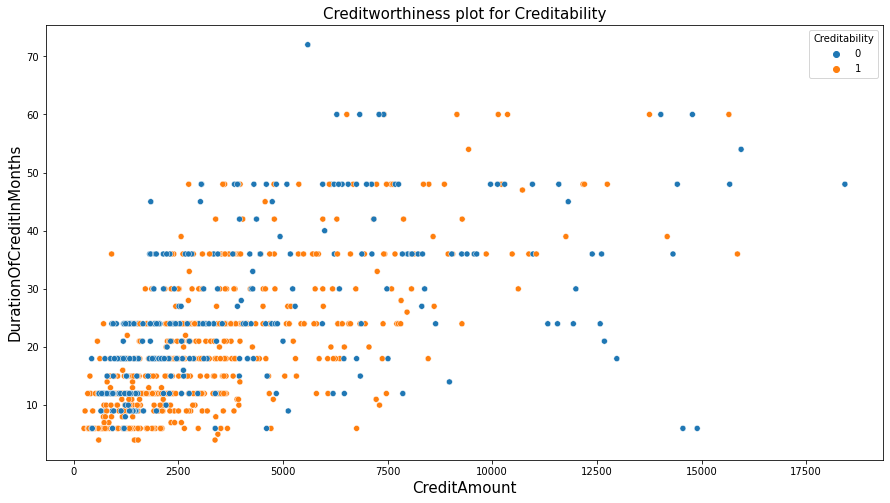

In [15]:
plt.figure(figsize= (15, 8))

sns.scatterplot(x= 'CreditAmount', y= 'DurationOfCreditInMonths', data= df, hue= 'Creditability')
plt.title("Creditworthiness plot for Creditability", fontsize= 15)
plt.xlabel('CreditAmount', fontsize= 15)
plt.ylabel('DurationOfCreditInMonths', fontsize= 15)

plt.show()

# 6. Prepare input data for the model

In [16]:
X= df.drop('Creditability', axis= 1)
y= df['Creditability']

ss= StandardScaler()
X= pd.DataFrame(ss.fit_transform(X), columns= X.columns, index= X.index)

In [17]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 5)

x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

# 7. Fit logistic regression model

In [18]:
lr= LogisticRegression()
lr_model= lr.fit(x_train, y_train)

In [19]:
y_pred_prob= lr_model.predict_proba(x_test)[:,1]
y_pred= lr_model.predict(x_test)

# 8. Test accuracy calculation

In [20]:
print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))

Accuracy: 0.6867


# 9. Build a confusion matrix

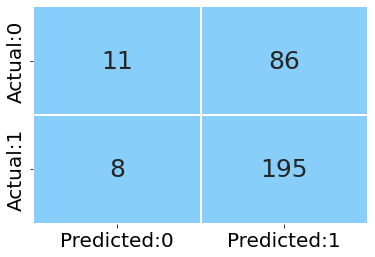

In [21]:
cm= confusion_matrix(y_test, y_pred)

conf_mat= pd.DataFrame(cm, columns= ['Predicted:0','Predicted:1'], index= ['Actual:0','Actual:1'])

sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [22]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

# Optimal Threshold: 0.731265

,TPR,FPR,Threshold,Difference
0,0.610837,0.391753,0.731265,0.219085
1,0.522167,0.309278,0.750079,0.212889
2,0.477833,0.268041,0.764434,0.209791
3,0.507389,0.298969,0.751749,0.208420
4,0.630542,0.422680,0.724932,0.207861


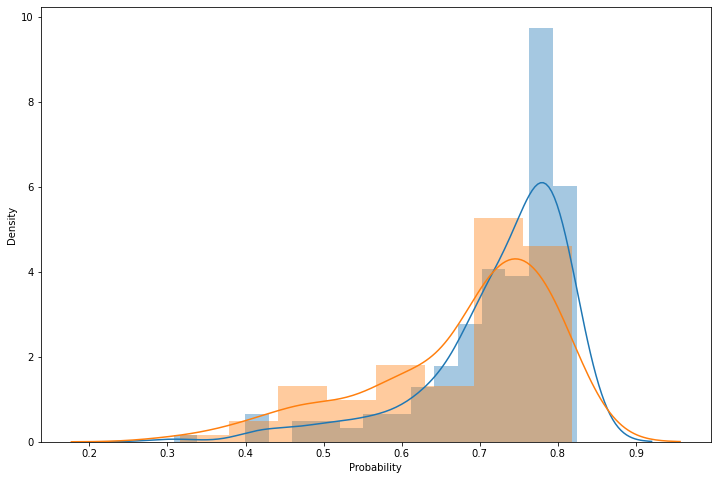

In [23]:
dataf= pd.DataFrame()

dataf['Original']= y_test
dataf['Probability']=  y_pred_prob

plt.figure(figsize=(12,8))
sns.distplot(dataf[dataf['Original'] == 1]['Probability'])
sns.distplot(dataf[dataf['Original'] == 0]['Probability'])

plt.show()

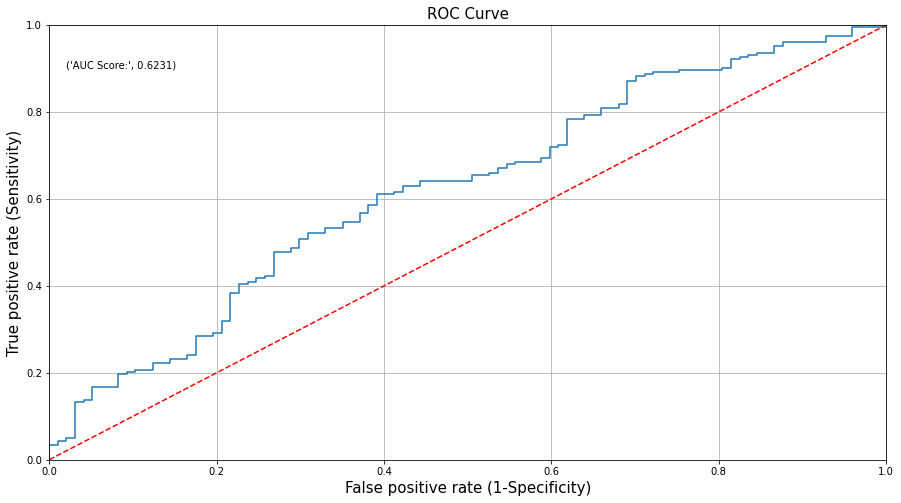

In [24]:
plt.figure(figsize= (15,8))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

**Inference:** We are not getting good accuracy for this dataset because the target variable is highly imbalanced. Although not desirable but we will now build a model by removing values from one class of the target variable on the basis of heavily influencing outliers.

In [25]:
Q1= creditability1.quantile(0.25)
Q3= creditability1.quantile(0.75)
IQR= Q3 - Q1

LL= Q1-(0.25*IQR)
UL= Q3+(0.25*IQR)

df1= creditability1[~((creditability1>UL) | (creditability1<LL)).any(axis= 1)]

df_out= pd.concat([df1, creditability0], axis= 0)

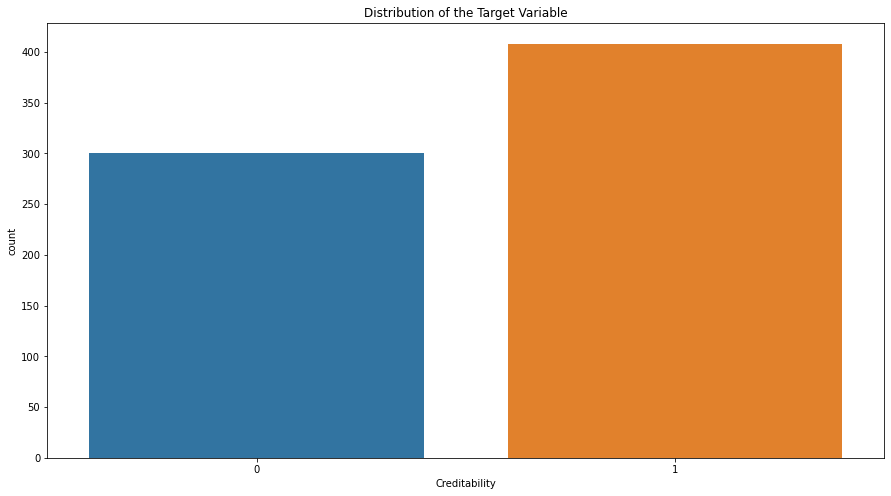

In [38]:
plt.figure(figsize= (15,8))

sns.countplot(df_out['Creditability'])
plt.title("Distribution of the Target Variable")

plt.show()

In [27]:
df_out['Creditability'].value_counts()

1    408
0    300
Name: Creditability, dtype: int64

In [28]:
X= df_out.drop('Creditability', axis= 1)
y= df_out['Creditability']

ss= StandardScaler()

X= pd.DataFrame(ss.fit_transform(X), columns= X.columns, index= X.index)

In [29]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 5)

x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

In [30]:
dt_model= DecisionTreeClassifier(random_state= 10)
dt_model.fit(x_train, y_train)

y_pred= dt_model.predict(x_test)
y_pred_prob= dt_model.predict_proba(x_test)

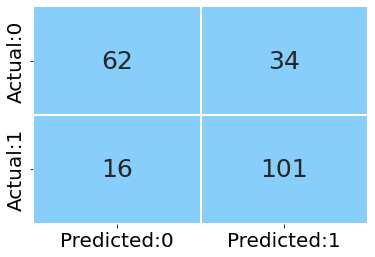

In [31]:
accuracy_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

conf_mat= pd.DataFrame(cm, columns= ['Predicted:0','Predicted:1'], index= ['Actual:0','Actual:1'])

sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

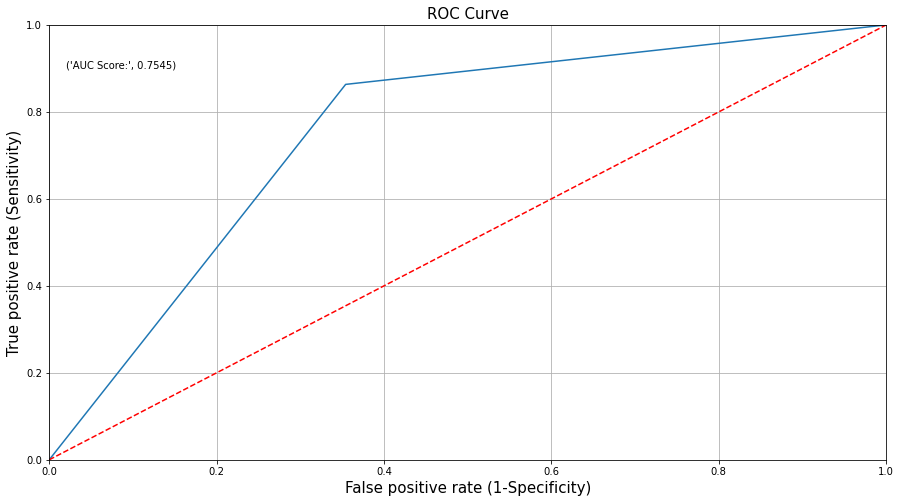

In [32]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_prob[:,1])

plt.figure(figsize= (15,8))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob[:,1]),4)))
plt.grid(True)

In [33]:
rf= RandomForestClassifier(random_state= 10)
rf.fit(x_train, y_train)

y_pred= rf.predict(x_test)
y_pred_prob= rf.predict_proba(x_test)

In [34]:
accuracy_score(y_test, y_pred)

0.7793427230046949

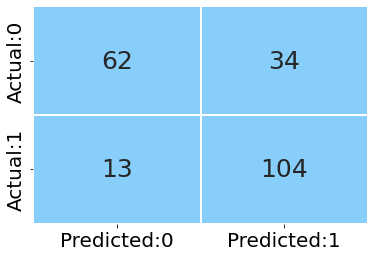

In [35]:
cm= confusion_matrix(y_test, y_pred)

conf_mat= pd.DataFrame(cm, columns= ['Predicted:0','Predicted:1'], index= ['Actual:0','Actual:1'])

sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

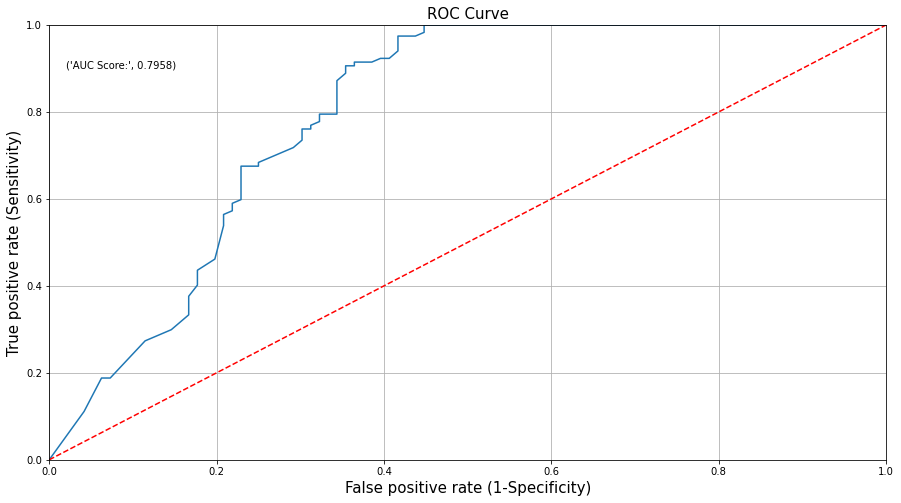

In [36]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_prob[:,1])

plt.figure(figsize= (15,8))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob[:,1]),4)))
plt.grid(True)